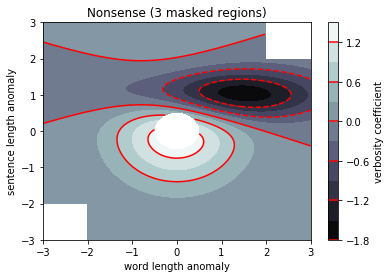

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

origin = 'lower'
#origin = 'upper'

delta = 0.025

x = y = np.arange(-3.0, 3.01, delta)
X, Y = np.meshgrid(x, y)
Z1 = plt.mlab.bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)
Z2 = plt.mlab.bivariate_normal(X, Y, 1.5, 0.5, 1, 1)
Z = 10 * (Z1 - Z2)

nr, nc = Z.shape

# put NaNs in one corner:
Z[-nr//6:, -nc//6:] = np.nan
# contourf will convert these to masked


Z = np.ma.array(Z)
# mask another corner:
Z[:nr//6, :nc//6] = np.ma.masked

# mask a circle in the middle:
interior = np.sqrt((X**2) + (Y**2)) < 0.5
Z[interior] = np.ma.masked

# We are using automatic selection of contour levels;
# this is usually not such a good idea, because they don't
# occur on nice boundaries, but we do it here for purposes
# of illustration.
CS = plt.contourf(X, Y, Z, 10,
                  #[-1, -0.1, 0, 0.1],
                  #alpha=0.5,
                  cmap=plt.cm.bone,
                  origin=origin)

# Note that in the following, we explicitly pass in a subset of
# the contour levels used for the filled contours.  Alternatively,
# We could pass in additional levels to provide extra resolution,
# or leave out the levels kwarg to use all of the original levels.

CS2 = plt.contour(CS, levels=CS.levels[::2],
                  colors='r',
                  origin=origin)

plt.title('Nonsense (3 masked regions)')
plt.xlabel('word length anomaly')
plt.ylabel('sentence length anomaly')

# Make a colorbar for the ContourSet returned by the contourf call.
cbar = plt.colorbar(CS)
cbar.ax.set_ylabel('verbosity coefficient')
# Add the contour line levels to the colorbar
cbar.add_lines(CS2)

plt.figure()

# Now make a contour plot with the levels specified,
# and with the colormap generated automatically from a list
# of colors.
levels = [-1.5, -1, -0.5, 0, 0.5, 1]
CS3 = plt.contourf(X, Y, Z, levels,
                   colors=('r', 'g', 'b'),
                   origin=origin,
                   extend='both')
# Our data range extends outside the range of levels; make
# data below the lowest contour level yellow, and above the
# highest level cyan:
CS3.cmap.set_under('yellow')
CS3.cmap.set_over('cyan')

CS4 = plt.contour(X, Y, Z, levels,
                  colors=('k',),
                  linewidths=(3,),
                  origin=origin)
plt.title('Listed colors (3 masked regions)')
plt.clabel(CS4, fmt='%2.1f', colors='w', fontsize=14)

# Notice that the colorbar command gets all the information it
# needs from the ContourSet object, CS3.
plt.colorbar(CS3)

# Illustrate all 4 possible "extend" settings:
extends = ["neither", "both", "min", "max"]
cmap = plt.cm.get_cmap("winter")
cmap.set_under("magenta")
cmap.set_over("yellow")
# Note: contouring simply excludes masked or nan regions, so
# instead of using the "bad" colormap value for them, it draws
# nothing at all in them.  Therefore the following would have
# no effect:
# cmap.set_bad("red")

fig, axs = plt.subplots(2, 2)
fig.subplots_adjust(hspace=0.3)

for ax, extend in zip(axs.ravel(), extends):
    cs = ax.contourf(X, Y, Z, levels, cmap=cmap, extend=extend, origin=origin)
    fig.colorbar(cs, ax=ax, shrink=0.9)
    ax.set_title("extend = %s" % extend)
    ax.locator_params(nbins=4)

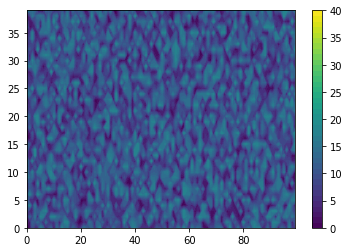

In [2]:
import matplotlib.pyplot as plt
import numpy as np

rd = np.random.rand(40,100)
surface = 18 * rd           # maximum value will be 18

fig = plt.figure()
ax = fig.add_subplot(111)

cores = ax.contourf(surface[:], levels=range(41))
cbar = plt.colorbar(cores)

plt.show()